**Exercise 16.1**

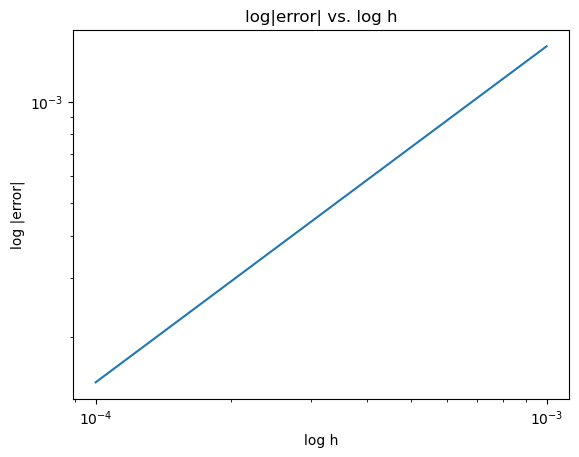

In [18]:
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt

def f( x ):
    return np.cos( x ) + np.sin( 3 * x ) 

x = sp.symbols( 'x' )
f_expr = sp.cos( x ) + sp.sin( 3 * x ) # for sympy

x0 = 2
exact = sp.diff( f_expr, x)
exact_val = float( exact.subs( x, x0 ) )
h = np.linspace( 0.0001, 0.001, 11 )

approx = ( f( x0 + h ) - f( x0 ) ) / h
error = exact_val - approx

plt.close()
plt.xlabel( "log h" )
plt.ylabel( "log |error|" )
plt.title( "log|error| vs. log h" )
plt.loglog( h, np.abs( error ) )
plt.show()

**Exercise 16.2**

The errors do not always decrease as you decrease h due to machine round off error. 

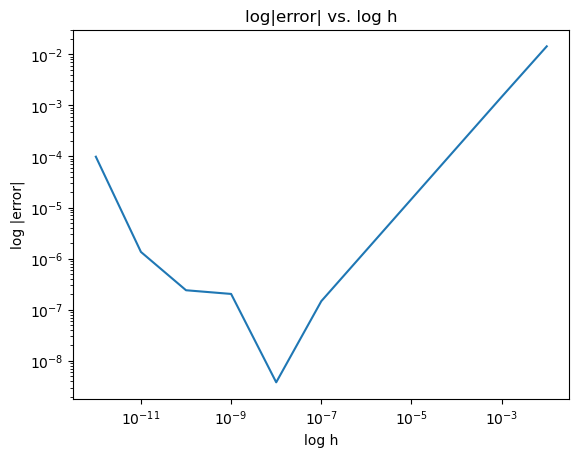

In [26]:
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt

def f( x ):
    return np.cos( x ) + np.sin( 3 * x ) 

x = sp.symbols( 'x' )
f_expr = sp.cos( x ) + sp.sin( 3 * x ) # for sympy

x0 = 2
exact = sp.diff( f_expr, x)
exact_val = float( exact.subs( x, x0 ) )
h = np.array( [ 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9, 10**-10, 10**-11, 10**-12 ] )

approx = ( f( x0 + h ) - f( x0 ) ) / h
error = exact_val - approx

plt.close()
plt.xlabel( "log h" )
plt.ylabel( "log |error|" )
plt.title( "log|error| vs. log h" )
plt.loglog( h, np.abs( error ) )
plt.show()

**Exercise 16.4a**

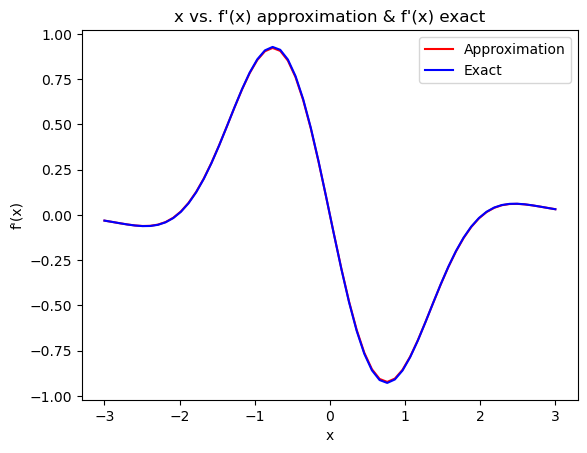

In [36]:
import numpy as np 
import sympy as sp 
import matplotlib.pyplot as plt

# Exact 
x = sp.symbols( 'x' )
f_expr = sp.cos( x ) * sp.exp( -0.5 * ( x ** 2 ) ) # for sympy
exact = sp.diff( f_expr, x)
domain = np.linspace( -3, 3, 60 )
exact_val = np.array([])
for i in domain:
    exact_val = np.append( exact_val, float( exact.subs( x, i ) ) )

# Approximation
def f( x ):
    return np.cos( x ) * np.exp( -0.5 * ( x ** 2 ) )
h = 0.1 
approx = ( f( domain + h ) - f( domain - h ) ) / ( 2 * h )

# Plot
plt.close()
fig, (ax) = plt.subplots(1, 1)
ax.plot( domain, approx, color="red", label="Approximation" )
ax.plot( domain, exact_val, color="blue", label="Exact" )
plt.xlabel( "x" )
plt.ylabel( "f'(x)" )
plt.title( "x vs. f'(x) approximation & f'(x) exact" )
plt.legend()
plt.show()

**Exercise 16.4b**

- The convergence test succeeds because the graph shows that the error is approximately proportal to h^2 (when h is above a certain value).
- When h decreases below 0.0001, the error becomes larger due to machine round off error. 

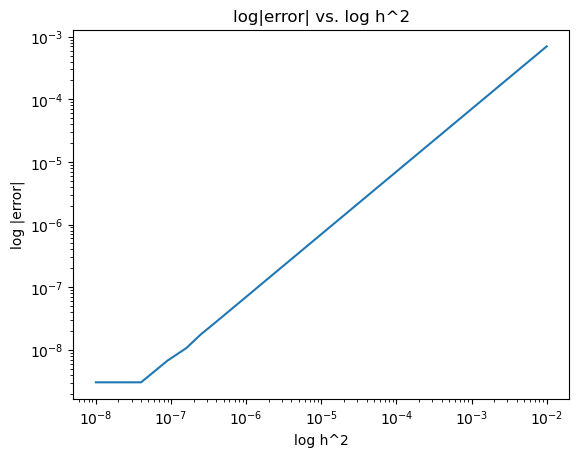

In [40]:
import numpy as np 
import matplotlib.pyplot as plt

x0 = 1

# f(x) = sin(x) 
# f'(x) = cos(x)
# f''(x) = -sin(x)
# f''(1)
exact = -np.sin( x0 )

def f( x ):
    return np.sin( x )

h = np.linspace( 0.0001, 0.1, 1000 )
approx = ( f( x0 - h ) - 2 * f( x0 ) + f( x0 + h ) ) / ( h ** 2 )
error = np.abs( approx - exact )

plt.close()
plt.xlabel( "log h^2" )
plt.ylabel( "log |error|" )
plt.title( "log|error| vs. log h^2" )
plt.loglog( h**2, error )
plt.show()

**Exercise 16.5b**

The higher the N value, the more exact the approximation. 

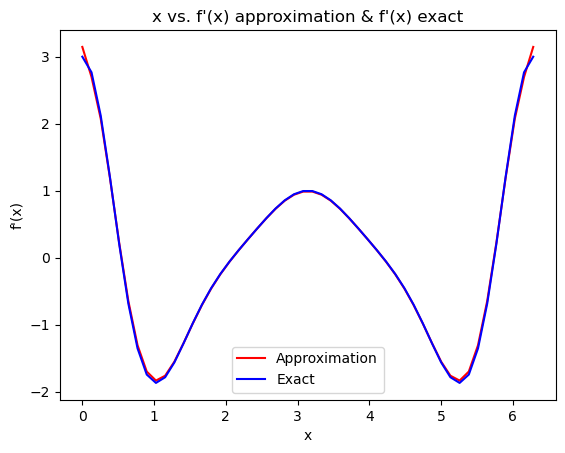

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin( x + 2 * np.sin( x ) )

def fprime_exact(x): # Calculated derivative manually
    return np.cos( x + 2 * np.sin( x ) ) * ( 1 + 2 * np.cos( x ) )

# x --> array of N points
# y --> f(x)
def finite_difference_derivative( x, y ):
    N = len( x )
    h = x[1] - x[0] 
    ret = np.empty( N, dtype=float )

    # Left endpoint, forward 3-point
    ret[ 0 ] = ( -3 * y[ 0 ] + 4 * y[ 1 ] - y[ 2 ]) / ( 2 * h )

    # Interior: centered 3-point
    ret[ 1 : -1 ] = ( y[ 2: ] - y[ :-2 ]) / ( 2 * h )

    # Right endpoint, backward 3-point
    ret[ -1 ] = ( 3 * y[ -1 ] - 4 * y[ -2 ] + y[ -3 ] ) / ( 2 * h )

    return ret

# Vary N values 
# N = 10 
N = 50

x = np.linspace( 0, 2 * np.pi, N )
y = f(x)
approx = finite_difference_derivative( x, y )
exact = fprime_exact(x)

# Plotting 
plt.close();
fig, (ax) = plt.subplots(1, 1)
ax.plot( x, approx, color="red", label="Approximation" )
ax.plot( x, exact, color="blue", label="Exact" )
plt.xlabel( "x" )
plt.ylabel( "f'(x)" )
plt.title( "x vs. f'(x) approximation & f'(x) exact" )
plt.legend()
plt.show()